In [1]:
from IPython.display import Image

------------------------
#### Next Word Prediction with NLP and Deep Learning
-------------------------

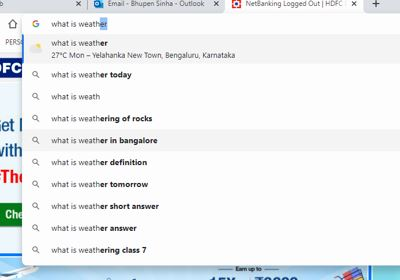

In [2]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\LM-nw-00.JPG', width=500)

- As we type in what is the weather we already receive some predictions. 

- We can see that `certain next words` are predicted for the weather. 

- It would `save a lot of time` 

- used by our `virtual assistant` to complete certain sentences. 

In [3]:
import pickle
import numpy as np
import os

#### Dataset
"""

    Dataset: http://www.gutenberg.org/cache/epub/5200/pg5200.txt
    Remove all the unnecessary data and label it as Metamorphosis-clean.
    The starting and ending lines should be as follows.
    

"""

In [4]:
file = open(r"D:\MYLEARN\DATASETS\next_word_corpus.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The 1st Line: ", lines[0])
print("The 2nd Line: ", lines[1])
print("The 3rd Line: ", lines[2])
print("...")
print("...")
print("The Last 3rd Line: ",  lines[-3])
print("The Last 2nd Line: ",  lines[-2])
print("The Last     Line: ",  lines[-1])

The 1st Line:  The Project Gutenberg EBook of Metamorphosis, by Franz Kafka

The 2nd Line:  Translated by David Wyllie.

The 3rd Line:  

...
...
The Last 3rd Line:  including how to make donations to the Project Gutenberg Literary

The Last 2nd Line:  Archive Foundation, how to help produce our new eBooks, and how to

The Last     Line:  subscribe to our email newsletter to hear about new eBooks.


#### Cleaning the data

- replace all the unnecessary extra new lines, the carriage return, and the Unicode character.

In [5]:
data = ""

# make a string
for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:500]

'The Project Gutenberg EBook of Metamorphosis, by Franz Kafka Translated by David Wyllie.  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org  ** This is a COPYRIGHTED Project Gutenberg eBook, Details Below ** **     Please follow the copyright guidelines in this file.     **   Title: Metamorphosis  Au'

In [6]:
import string

`maketrans()`

- method is a static method that creates a one to one mapping of a character to its translation/replacement.

- It creates a `Unicode representation` of each character for translation.

- This translation mapping is then used for replacing a character to its mapped character when used in translate() method.

- Return value from String maketrans()
    - The maketrans() method returns a translation table with a 1-to-1 mapping of a `Unicode ordinal` to its translation/replacement.

`Translation table using a dictionary`

In [7]:
# example dictionary
dict   = {"a": "xx", "b": "yy", "c": "zz"}
string1 = "abc"

print(string1.maketrans(dict))

{97: 'xx', 98: 'yy', 99: 'zz'}


In [8]:
# example dictionary
dict   = {97: "123", 98: "456", 99: "789"}
string1 = "abc"

print(string1.maketrans(dict))

{97: '123', 98: '456', 99: '789'}


`Translation table using two strings`

In [9]:
# first string
firstString  = "abc"
secondString = "def"

string1 = "abc"
print(string1.maketrans(firstString, secondString))

{97: 100, 98: 101, 99: 102}


In this case, 
- 97 ('a') is mapped to 100 ('d') 
- 98 ('b') is mapped to 101 ('e')  
- 99 ('c') is mapped to 102 ('f')

In [10]:
# example dictionary
firstString  = "abc"
secondString = "defghi"

string1 = "abc"
print(string1.maketrans(firstString, secondString))

ValueError: the first two maketrans arguments must have equal length

Trying to create a translation table for unequal length strings raises a ValueError exception indicating that the strings must have equal length.

`Translational table with removable string`

In [11]:
# first string
firstString  = "abc"
secondString = "def"

thirdString  = "adxyz"

string1 = "abc"
print(string1.maketrans(firstString, secondString, thirdString))

{97: None, 98: 101, 99: 102, 100: None, 120: None, 121: None, 122: None}


- Here, first, the mapping between the two strings `firstString` and `secondString` are created.

- Then, the third argument `thirdString` resets the mapping of each character in it to `None` and also creates a new mapping for non-existent characters.

- In this case, thirdString resets 
    - the mapping of 97 ('a') and 98 ('b') to None, and 
    - also creates a new mapping for 100 ('d') mapped to None.

In [12]:
# first string
firstString  = "abc"
secondString = "ghi"

thirdString  = "ab"

string1 = "abcdef"
print("Original string:", string1)

translation = string1.maketrans(firstString, secondString, thirdString)

print(translation)

# translate string
print("Translated string:", string1.translate(translation))

Original string: abcdef
{97: None, 98: None, 99: 105}
Translated string: idef


#### ... back to the code ..

In [13]:
string.punctuation   # all punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
len(string.punctuation)

32

In [15]:
' '*len(string.punctuation)

'                                '

In [16]:
# map punctuation to space
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) 

In [17]:
new_data = data.translate(translator)

In [18]:
new_data[:500]

'The Project Gutenberg EBook of Metamorphosis  by Franz Kafka Translated by David Wyllie   This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever   You may copy it  give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg org     This is a COPYRIGHTED Project Gutenberg eBook  Details Below           Please follow the copyright guidelines in this file           Title  Metamorphosis  Au'

#### take only unique words, then make a string

In [19]:
z = []

for i in new_data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)

In [20]:
data[:500]

'The Project Gutenberg EBook of Metamorphosis by Franz Kafka Translated David Wyllie This eBook is for the use anyone anywhere at no cost and with almost restrictions whatsoever You may copy it give away or re under terms License included this online www gutenberg org a COPYRIGHTED Details Below Please follow copyright guidelines in file Title Author Translator Release Date August 16 2005 5200 First posted May 13 2002 Last updated 20 2012 Language English START OF THIS PROJECT GUTENBERG EBOOK MET'

#### Tokenization

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

Example on Keras tokenizer ...

In [22]:
t        = Tokenizer()
fit_text = "The earth is an awesome place live"

t.fit_on_texts(fit_text)

In [23]:
print(set(fit_text))

{'o', 'h', 'n', 'v', 'e', 'm', 't', 'c', 'w', 'p', 'a', 'r', 'i', 'l', 's', 'T', ' '}


In [24]:
print(t.word_index)

{'e': 1, 'a': 2, 't': 3, 'h': 4, 'i': 5, 's': 6, 'l': 7, 'r': 8, 'n': 9, 'w': 10, 'o': 11, 'm': 12, 'p': 13, 'c': 14, 'v': 15}


In [25]:
test_text = "The earth is an great place live"
sequences = t.texts_to_sequences(test_text)

print("sequences : ", sequences,'\n')

sequences :  [[3], [4], [1], [], [1], [2], [8], [3], [4], [], [5], [6], [], [2], [9], [], [], [8], [1], [2], [3], [], [13], [7], [2], [14], [1], [], [7], [5], [15], [1]] 



#### .. back to main code ...

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

In [27]:
tokenizer.document_count

1

In [28]:
print(list(tokenizer.word_docs)[:25])

['soughing', 'release', 'squeaking', 'become', 'nourishment', 'accuse', 'indirect', 'however', 'must', 'spineless', 'bin', 'bank', 'indirectly', 'anew', 'calculated', 'hanging', 'hissed', 'ak', 'humbly', 'both', 'physical', 'away', 'noticing', 'quickly', 'cheer']


In [29]:
print(len(list(tokenizer.word_counts)))

3016


In [30]:
print(len(list(tokenizer.word_docs)))

3016


In [31]:
print(len(list(tokenizer.word_index)))

3016


In [32]:
# print(tokenizer.word_counts)                        # ordered dict
# print(tokenizer.word_docs)                          # ordered dict                     
# print(tokenizer.word_index)                         # dict

In [33]:
# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

In [34]:
sequence_data = tokenizer.texts_to_sequences([data])[0]             # 2D array, only 1 doc, extract by [0]
print(sequence_data[:50])

[1, 35, 2, 3, 4, 36, 37, 227, 228, 229, 230, 231, 5, 3, 6, 7, 1, 8, 232, 233, 38, 9, 234, 10, 11, 235, 236, 237, 12, 39, 238, 40, 41, 239, 13, 240, 14, 42, 15, 241, 5, 242, 243, 2, 244, 43, 44, 245, 45, 16]


In [35]:
len(sequence_data)

3276

In [36]:
text_data = tokenizer.sequences_to_texts([sequence_data])[0]
text_data[:100]

'the project gutenberg ebook of metamorphosis by franz kafka translated david wyllie this ebook is fo'

In [37]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

3017


In [38]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3275


array([[  1,  35],
       [ 35,   2],
       [  2,   3],
       [  3,   4],
       [  4,  36],
       [ 36,  37],
       [ 37, 227],
       [227, 228],
       [228, 229],
       [229, 230]])

In [39]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [40]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 1 35  2  3  4]
The responses are:  [35  2  3  4 36]


In [42]:
from tensorflow.keras.utils import to_categorical

In [43]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
y.shape

(3275, 3017)

#### Creating the Model:

In [45]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

from tensorflow.keras.optimizers import Adam

In [46]:
model = Sequential()

model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             30170     
_________________________________________________________________
lstm (LSTM)                  (None, 1, 100)            44400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 3017)              304717    
Total params: 469,787
Trainable params: 469,787
Non-trainable params: 0
_________________________________________________________________


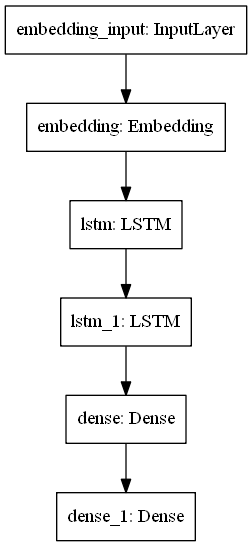

In [48]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

#### Callbacks

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping

In [51]:
# early stopping
es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1)

checkpoint = ModelCheckpoint("nextword1.h5", 
                             monitor='val_loss', 
                             verbose=1,
                             save_best_only=True, 
                             mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=3, 
                              min_lr=0.0001, 
                              verbose = 1)

# logdir='logsnextword1'
# tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [54]:
model.compile(loss     = "categorical_crossentropy", 
              optimizer= Adam(lr=0.001),
              metrics  = ['accuracy'])

In [55]:
%%time
history = model.fit(  X, 
                      y, 
                      validation_split=.2,
                      epochs=10, 
                      batch_size=64, 
                      callbacks=[checkpoint, reduce_lr])

Epoch 1/10
41/41 [==============================] - 7s 44ms/step - loss: 8.0143 - accuracy: 0.0000e+00 - val_loss: 8.0282 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 8.02823, saving model to nextword1.h5
Epoch 2/10
41/41 [==============================] - 1s 14ms/step - loss: 8.0064 - accuracy: 4.0024e-04 - val_loss: 8.0568 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 8.02823
Epoch 3/10
41/41 [==============================] - 1s 14ms/step - loss: 7.9996 - accuracy: 7.6044e-04 - val_loss: 8.0853 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 8.02823
Epoch 4/10
41/41 [==============================] - 1s 13ms/step - loss: 7.9926 - accuracy: 6.7194e-05 - val_loss: 8.1135 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss did not improve from 8.02823

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/10
41/41 [==============================] - 1s 14ms/step - loss: 7.9867 - ac

In [56]:
model.metrics_names

['loss', 'accuracy']

In [57]:
print(list(tokenizer.word_docs)[:25])

['soughing', 'release', 'squeaking', 'become', 'nourishment', 'accuse', 'indirect', 'however', 'must', 'spineless', 'bin', 'bank', 'indirectly', 'anew', 'calculated', 'hanging', 'hissed', 'ak', 'humbly', 'both', 'physical', 'away', 'noticing', 'quickly', 'cheer']


In [58]:
tokenizer.sequences_to_texts([sequence_data])[0][:200]

'the project gutenberg ebook of metamorphosis by franz kafka translated david wyllie this ebook is for the use anyone anywhere at no cost and with almost restrictions whatsoever you may copy it give aw'

In [61]:
tokenizer.word_index['father']

132

In [62]:
model.predict([132])

array([[0.00028519, 0.00033673, 0.00035756, ..., 0.0002852 , 0.00028519,
        0.0002852 ]], dtype=float32)